# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_matcher/py_matcher.html

In [99]:
# img = image on which we have to search  reffering as subject
# target = image to be searched on img

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [48]:
def load():
    global img
    original = cv2.imread("data/many_cereals.jpg", 0)
#     original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)  # try this also no worries I just commented because in the final 
#                                                             output I cannot distinguish between feature pointing lines and 
#                                                             images uncomment it and then try the output you will get to know
    img = original.copy()

In [79]:
def imshow(img):
    plt.figure(figsize=(7,7))
    plt.imshow(img, cmap = 'gray')

In [81]:
def template():
    global target
    original = cv2.imread("data/reeses_puffs.png", 0)
#     original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)  # try this also no worries I just commented because in the final 
#                                                             output I cannot distinguish between feature pointing lines and 
#                                                             images uncomment it and then try the output you will get to know
    target = original.copy()

In [82]:
load()

In [83]:
template()

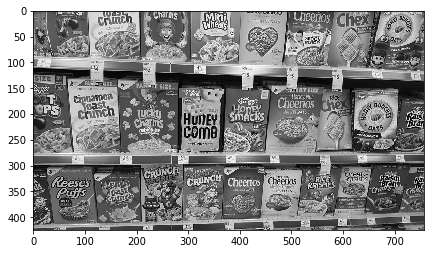

In [84]:
imshow(img)

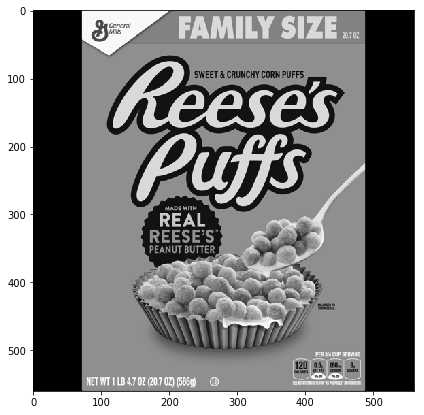

In [85]:
imshow(target)

# Brute force matching with ORB descriptors

In [86]:
# create detector
orb = cv2.ORB_create()

In [87]:
# image = target image
keypt1, descriptor1 = orb.detectAndCompute(image=target, mask=None)

In [88]:
keypt2, descriptor2 = orb.detectAndCompute(image=img, mask=None)

In [89]:
# Brute-Force matcher is simple. It takes the descriptor of one feature in first set and is matched with all other features
# in second set using some distance calculation. And the closest one is returned.

# For BF matcher, first we have to create the BFMatcher object using cv2.BFMatcher(). 
# It takes two optional params. First one is normType. It specifies the distance measurement to be used. 
# By default, it is cv2.NORM_L2. It is good for SIFT, SURF etc (cv2.NORM_L1 is also there). 

# For binary string based descriptors like ORB, BRIEF, BRISK etc, cv2.NORM_HAMMING should be used, which used Hamming distance
# as measurement.

# Second param is boolean variable, crossCheck which is false by default. 
# If it is true, Matcher returns only those matches with value (i,j) such that i-th descriptor in set A has j-th descriptor in 
# set B as the best match and vice-versa. That is, the two features in both sets should match each other. 
# It provides consistant result, and is a good alternative to ratio test proposed by D.Lowe in SIFT paper.

In [90]:
# brute force (bf) matcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [91]:
matches = bf.match(descriptor1, descriptor2)

In [92]:
# we can sort the matches based on the distance
# less the distance better is the match

In [93]:
single_match = matches[0]

In [94]:
single_match.distance

54.0

In [95]:
# doing all in one line
matches = sorted(matches, key=lambda x: x.distance)

In [96]:
len(matches)

136

In [97]:
# we are showing only top 20 matches as in total we have 149 matches, showing all is not visually effective
matched = cv2.drawMatches(target, keypt1, img, keypt2, matches[:], None)

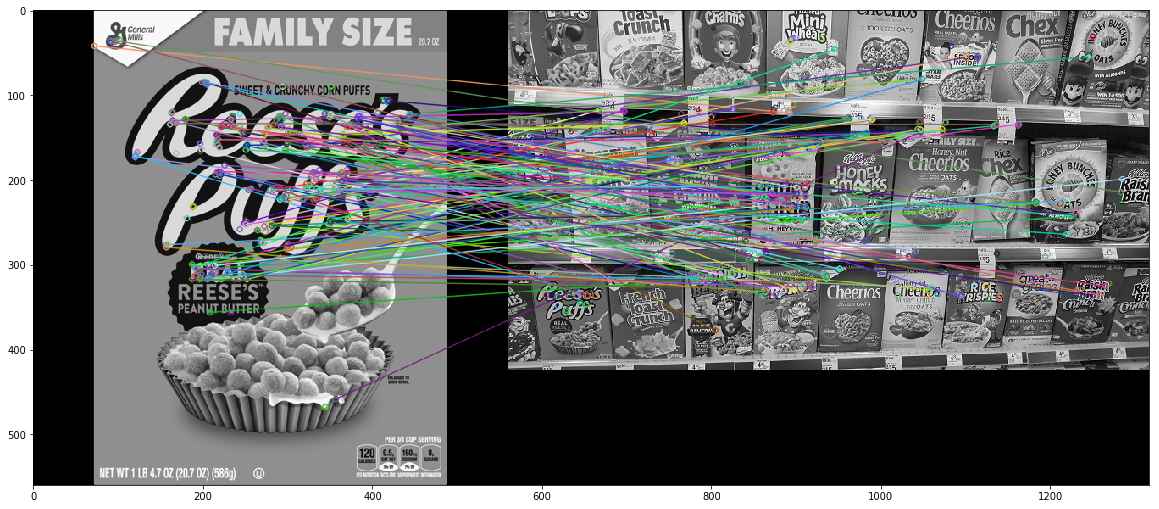

In [98]:
plt.figure(figsize=(20, 20))
plt.imshow(matched, cmap='gray')

In [72]:
# so we can clearly see that BF with ORB is not perfect we need better one

In [100]:
# I dont know but as i observed that if both subject and target have same color channel then minimum distance increases

# ORB with Scale invariant feature transform

In [101]:
# it is used when images are at different scale

# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_matcher/py_matcher.html

In [107]:
sift = cv2.SIFT()

AttributeError: module 'cv2.cv2' has no attribute 'SIFT'

# FLANN

In [109]:
# NOT COMPLETE